In [2]:
import os
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('/Users/Nico/Desktop/DSDATA' + '/updated1.csv')
data.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [4]:
data.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

In [15]:
data.shape

(41544, 60)

In [17]:
properties = list(data.columns[47:60])
properties

['Number of Television',
 'Number of CD/VCD/DVD',
 'Number of Component/Stereo set',
 'Number of Refrigerator/Freezer',
 'Number of Washing Machine',
 'Number of Airconditioner',
 'Number of Car, Jeep, Van',
 'Number of Landline/wireless telephones',
 'Number of Cellular phone',
 'Number of Personal Computer',
 'Number of Stove with Oven/Gas Range',
 'Number of Motorized Banca',
 'Number of Motorcycle/Tricycle']

In [36]:
data.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,total_expenditures
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,0,0,0,2,1,0,0,1,297030
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,1,0,0,0,3,1,0,0,2,184888
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,96213
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,1,0,0,0,0,130679
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,0,0,0,0,3,0,0,0,1,175402


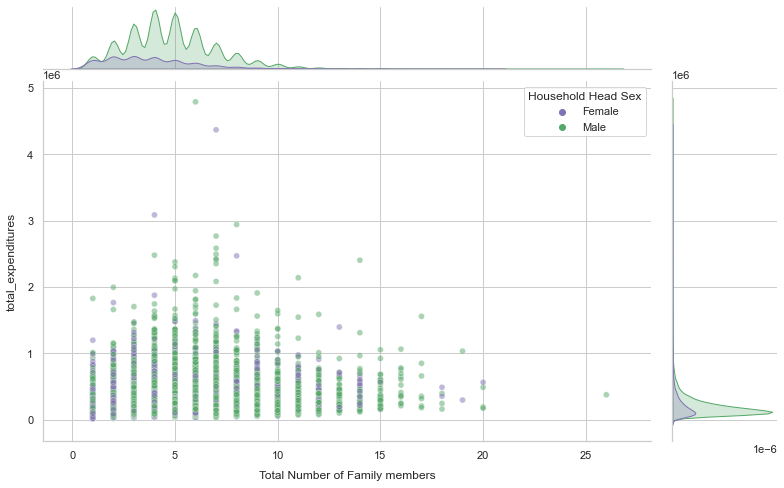

In [46]:
hhs_plot = sns.jointplot(data = data, x = "Total Number of Family members",
                         y = "total_expenditures", hue = "Household Head Sex", palette = {"Male":"g", "Female": "m"}, 
                        alpha = 0.5)
hhs_plot.fig.set_size_inches(12, 7)
hhs_plot.set_axis_labels("Total Number of Family members", "total_expenditures", labelpad = 10)

In [53]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
group_col = data['Household Head Sex']
order_of_bars = data['Household Head Age'].unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(data[group_col].unique())-1)) for i in range(len(data[group_col].unique()))]

for c, group in zip(colors, data[group_col].unique()):
    sns.barplot(x='Users', y='Stage', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)

# Decorations    
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()

KeyError: "None of [Index(['Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',\n       'Female', 'Male',\n       ...\n       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',\n       'Male'],\n      dtype='object', length=41544)] are in the [columns]"

<Figure size 1040x800 with 0 Axes>

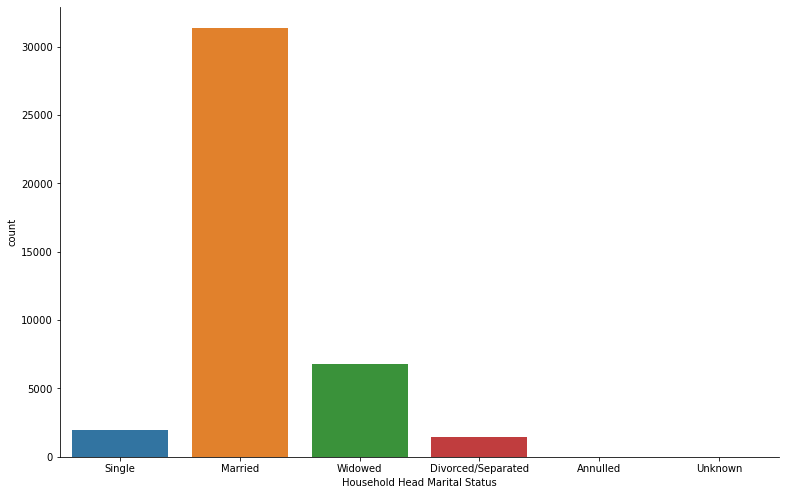

In [13]:
status_plot = sns.catplot(data = data, x ="Household Head Marital Status", kind = "count" )
status_plot.fig.set_size_inches(12, 7)

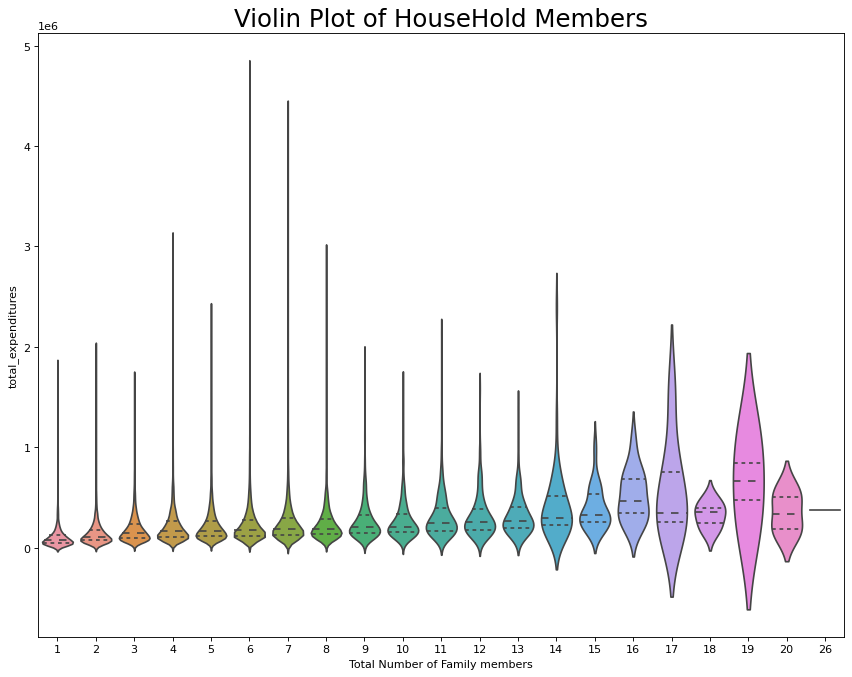

In [6]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x="Total Number of Family members", y= "total_expenditures", data=data, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of HouseHold Members', fontsize=22)
plt.show()

In [5]:
data['net income'] = data['Total Household Income'] - data['total_expenditures']

In [6]:
data['net income']

0        183302
1         13347
2        -13428
3        -23090
4         13920
          ...  
41539    -50473
41540    -16431
41541      9564
41542    -93985
41543    -64840
Name: net income, Length: 41544, dtype: int64

In [7]:
data.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,total_expenditures,net income
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,0,0,0,2,1,0,0,1,297030,183302
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,0,0,3,1,0,0,2,184888,13347
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,96213,-13428
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,1,0,0,0,0,130679,-23090
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,0,0,0,3,0,0,0,1,175402,13920


C:\Users\Nico\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Nico\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


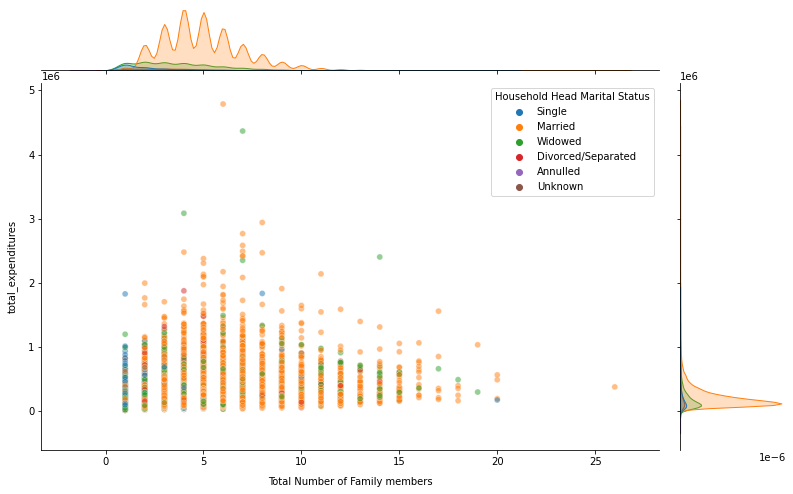

In [13]:
hhs_plot = sns.jointplot(data = data, x = "Total Number of Family members",
                         y = "total_expenditures", hue = "Household Head Marital Status", 
                        alpha = 0.5)
hhs_plot.fig.set_size_inches(12, 7)
hhs_plot.set_axis_labels("Total Number of Family members", "total_expenditures", labelpad = 10)

In [ ]:
data.to_csv (r'/Users/Nico/Desktop/DSDATA/DATANVI/UFIaE.csv', index = None, header = True)